In [51]:
from PoE_GPFlow import Generalised_PoE
m = Generalised_PoE()

In [52]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a simple dataset
np.random.seed(42)
X = np.linspace(0, 10, 500).reshape(-1, 1)
noise_std = 0.05
Y = np.sin(X) + noise_std * np.random.randn(500, 1)  # Noisy sine wave

In [53]:
m.train(X, Y, no_experts=3, allow_seperate_hyperparms=False)

Optimised hyperparameters: [1.87974675 0.00241762]


In [54]:
for i in range(3):
    print(np.allclose(m.models[i].kernel.lengthscales, m.joint_hyperparameters[0]))
    print(np.allclose(m.models[i].likelihood.variance, m.joint_hyperparameters[-1]))
print(np.allclose(m.joint_hyperparameters[-1], noise_std**2, atol=0.01))


True
True
True
True
True
True
True


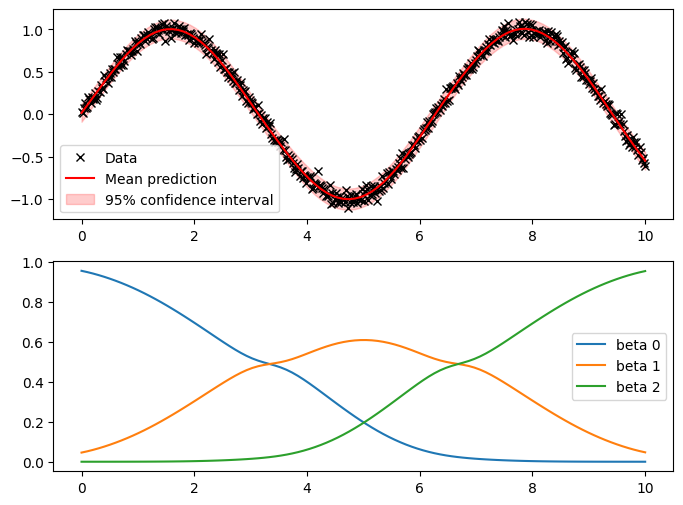

In [56]:
X_new = np.linspace(0, 10, 100).reshape(-1, 1)
mean, var, beta = m.predict(X_new)

fig, ax = plt.subplots(2, 1, figsize=(8, 6))
ax[0].plot(X, Y, 'kx', label='Data')
ax[0].plot(X_new, mean, 'r', label='Mean prediction')
ax[0].fill_between(X_new.flatten(), 
                   mean.flatten() - 1.96 * np.sqrt(var.flatten()), 
                   mean.flatten() + 1.96 * np.sqrt(var.flatten()), 
                   color='red', alpha=0.2, label='95% confidence interval')
ax[0].legend()
ax[1].plot(X_new, beta[:, 0], label='beta 0')
ax[1].plot(X_new, beta[:, 1], label='beta 1')
ax[1].plot(X_new, beta[:, 2], label='beta 2')
ax[1].legend()